# Scientific Computing 1: Precision, machine epsilon and numerical cancellation
This program explores various concepts related to scientific computing, such as IEEE 754 floating-point numbers, machine epsilon estimation, and numerical cancellation in *Archimedes' algorithm*.

In [1]:
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### IEEE 754 floating-point numbers
Program to produce "infinite" new numbers which cannot be represented exactly as an IEEE 754 floating-point number on a computer:

In [2]:
# Define initial, non-representable number:
a = 0.126
print(f"{a:.30f}")

# Add a non-representable number, can be done indefinitely:
for i in range(5):
    a += 0.08
    print(f"{a:.30f}")

0.126000000000000000888178419700
0.206000000000000016431300764452
0.286000000000000031974423109205
0.366000000000000047517545453957
0.446000000000000063060667798709
0.526000000000000023092638912203


### Machine epsilon (&epsilon;) estimation
Program that computes or approximates the machine epsilon for these cases:

* half precision (16 bit)
* single precision (32 bit)
* double precision (64 bit)

The algorithm is later run many times to measure the execution time.

In [3]:
def machine_epsilon(num, eps, div):
    while 1:
        if num + eps > num:
            eps /= div
        else:
            return eps

In [4]:
# Iterate with half precision:
print("\nHalf precision (16 bit) machine epsilon:")
one = np.float16(1)
epsilon = np.float16(1)
divide = np.float16(1.001)

print(machine_epsilon(one, epsilon, divide))

# Iterate with single precision:
print("\nSingle precision (32 bit) machine epsilon:")
one = np.float32(1)
epsilon = np.float32(1)
divide = np.float32(1.001)

print(machine_epsilon(one, epsilon, divide))

# Iterate with double precision:
print("\nDouble precision (64 bit) machine epsilon:")
one = np.float64(1)
epsilon = np.float64(1)
divide = np.float64(1.001)

print(machine_epsilon(one, epsilon, divide))


Half precision (16 bit) machine epsilon:
0.0004883

Single precision (32 bit) machine epsilon:
5.9549674e-08

Double precision (64 bit) machine epsilon:
1.1092978472145843e-16


Longer runtime of single precision and double precision machine epsilon algorithm to estimate time complexity:

In [5]:
# Initial values for single precision:
one_32 = np.float32(1)
epsilon = np.float32(1)
divide = np.float32(1.0000001)

print("Single precision (32 bit) machine epsilon:")
tick = time.time()
print(machine_epsilon(one_32, epsilon, divide))
tock = time.time()

# Calculate and print the execution time:
speed = tock - tick
print(f"{speed:.2f} seconds")

Single precision (32 bit) machine epsilon:
5.9604645e-08
9.23 seconds


In [6]:
# Initial values for double precision:
one_64 = np.float64(1)
epsilon = np.float64(1)
divide = np.float64(1.0000001)

print("Double precision (64 bit) machine epsilon:")
tick = time.time()
print(machine_epsilon(one_64, epsilon, divide))
tock = time.time()

# Calculate and print the execution time:
speed = tock - tick
print(f"{speed:.2f} seconds")

Double precision (64 bit) machine epsilon:
1.1102230080474698e-16
22.86 seconds


As evident from the calculations above, the algorithm has a complexity of $\mathcal{O}(n)$, where $n$ is the number of divisions. If the calculation is repeated $m$ times, the complexity is $\mathcal{O}(nm)$.

### Numerical cancellation in Archimedes' algorithm
Computer program that demonstrates the problem of numerical cancellation in *Archimedes' algorithm*. The algorithm is one of the oldest known methods to compute the value of $\pi$, the area of a unit circle.

**The unit circle is approximated in two ways:**
1. By an inscribed regular polygon with $n$ edges of length $l_{n}$ and area $a_{n}$.
2. By a circumscribed regular polygon with $n$ edges of length $L_{n}$ and area $A_{n}$.

Obviously, $a_{n} < \pi < A_{n}$. By increasing $n$, both areas should approach the value of $\pi$.

**In modern form, the algorithm goes as follows:**
1. Start with $n = 2$. Set the inner edge length to $l_{n} = 2$.
2. Compute $r_{n} = \sqrt{1 - l_{n}^2/4}$, the length from the circle center to the middle of an edge of the inscribed polygon.
3. Compute the polygon areas as $a_{n} = n l_{n} r_{n}/2$ and $A_{n} = n L_{n}/2$. The edge length of the circumscribed polygon is given by $L_{n} = l_{n}/r_{n}$.
4. Double $n$ and use the recursion formula $l_{2n} = \sqrt{2 - 2r_{n}}$ to calculate the edge length of the new inscribed polygon.
5. Repeat steps 2 to 4 until the areas no longer change.

In [7]:
# Archimedes algorithm with single precision (32 bit):
def archimedes_single(arr=np.array([2, 0, np.Inf]), n=np.float32(2), l_n=np.float32(2)):
    # Initial values:
    r_n = np.sqrt(np.float32(1) - (l_n**2)/np.float32(4))
    warnings.filterwarnings("ignore", category=RuntimeWarning)  # to suppress division by 0 warning
    L_n = l_n / r_n
    count = 0

    # Iterate over higher and higher edge numbers until A_n == a_n:
    while 1:
        count += 1

        a_n = n * np.float32(l_n) * np.float32(r_n) / 2
        A_n = n * np.float32(L_n) / 2

        line = np.array([count, a_n, A_n])
        arr = np.vstack((arr, line))

        if A_n != a_n:
            n *= 2
            l_n = np.float32(np.sqrt(2 - 2 * r_n))
            r_n = np.float32(np.sqrt(1 - (l_n**2)/4))
            L_n = l_n / r_n
        else:
            warnings.filterwarnings("default", category=RuntimeWarning)
            return arr

# Archimedes algorithm with double precision (64 bit):
def archimedes_double(arr=np.array([2, 0, np.Inf]), n=np.float64(2), l_n=np.float64(2)):
    # Initial values:
    r_n = np.sqrt(np.float64(1) - (l_n**2)/np.float64(4))
    warnings.filterwarnings("ignore", category=RuntimeWarning)  # to suppress division by 0 warning
    L_n = l_n / r_n
    count = 0

    # Iterate over higher and higher edge numbers until A_n == a_n:
    while 1:
        count += 1

        a_n = n * np.float64(l_n) * np.float64(r_n) / 2
        A_n = n * np.float64(L_n) / 2
        
        line = np.array([count, a_n, A_n])
        arr = np.vstack((arr, line))

        if A_n != a_n:
            n *= 2
            l_n = np.float64(np.sqrt(2 - 2 * r_n))
            r_n = np.float64(np.sqrt(1 - (l_n**2)/4))
            L_n = l_n / r_n
        else:
            warnings.filterwarnings("default", category=RuntimeWarning)  # to suppress division by 0 warning
            return arr

Plot showing $a_{n}$ and $A_{n}$ as functions of $n$ in single and double precision:

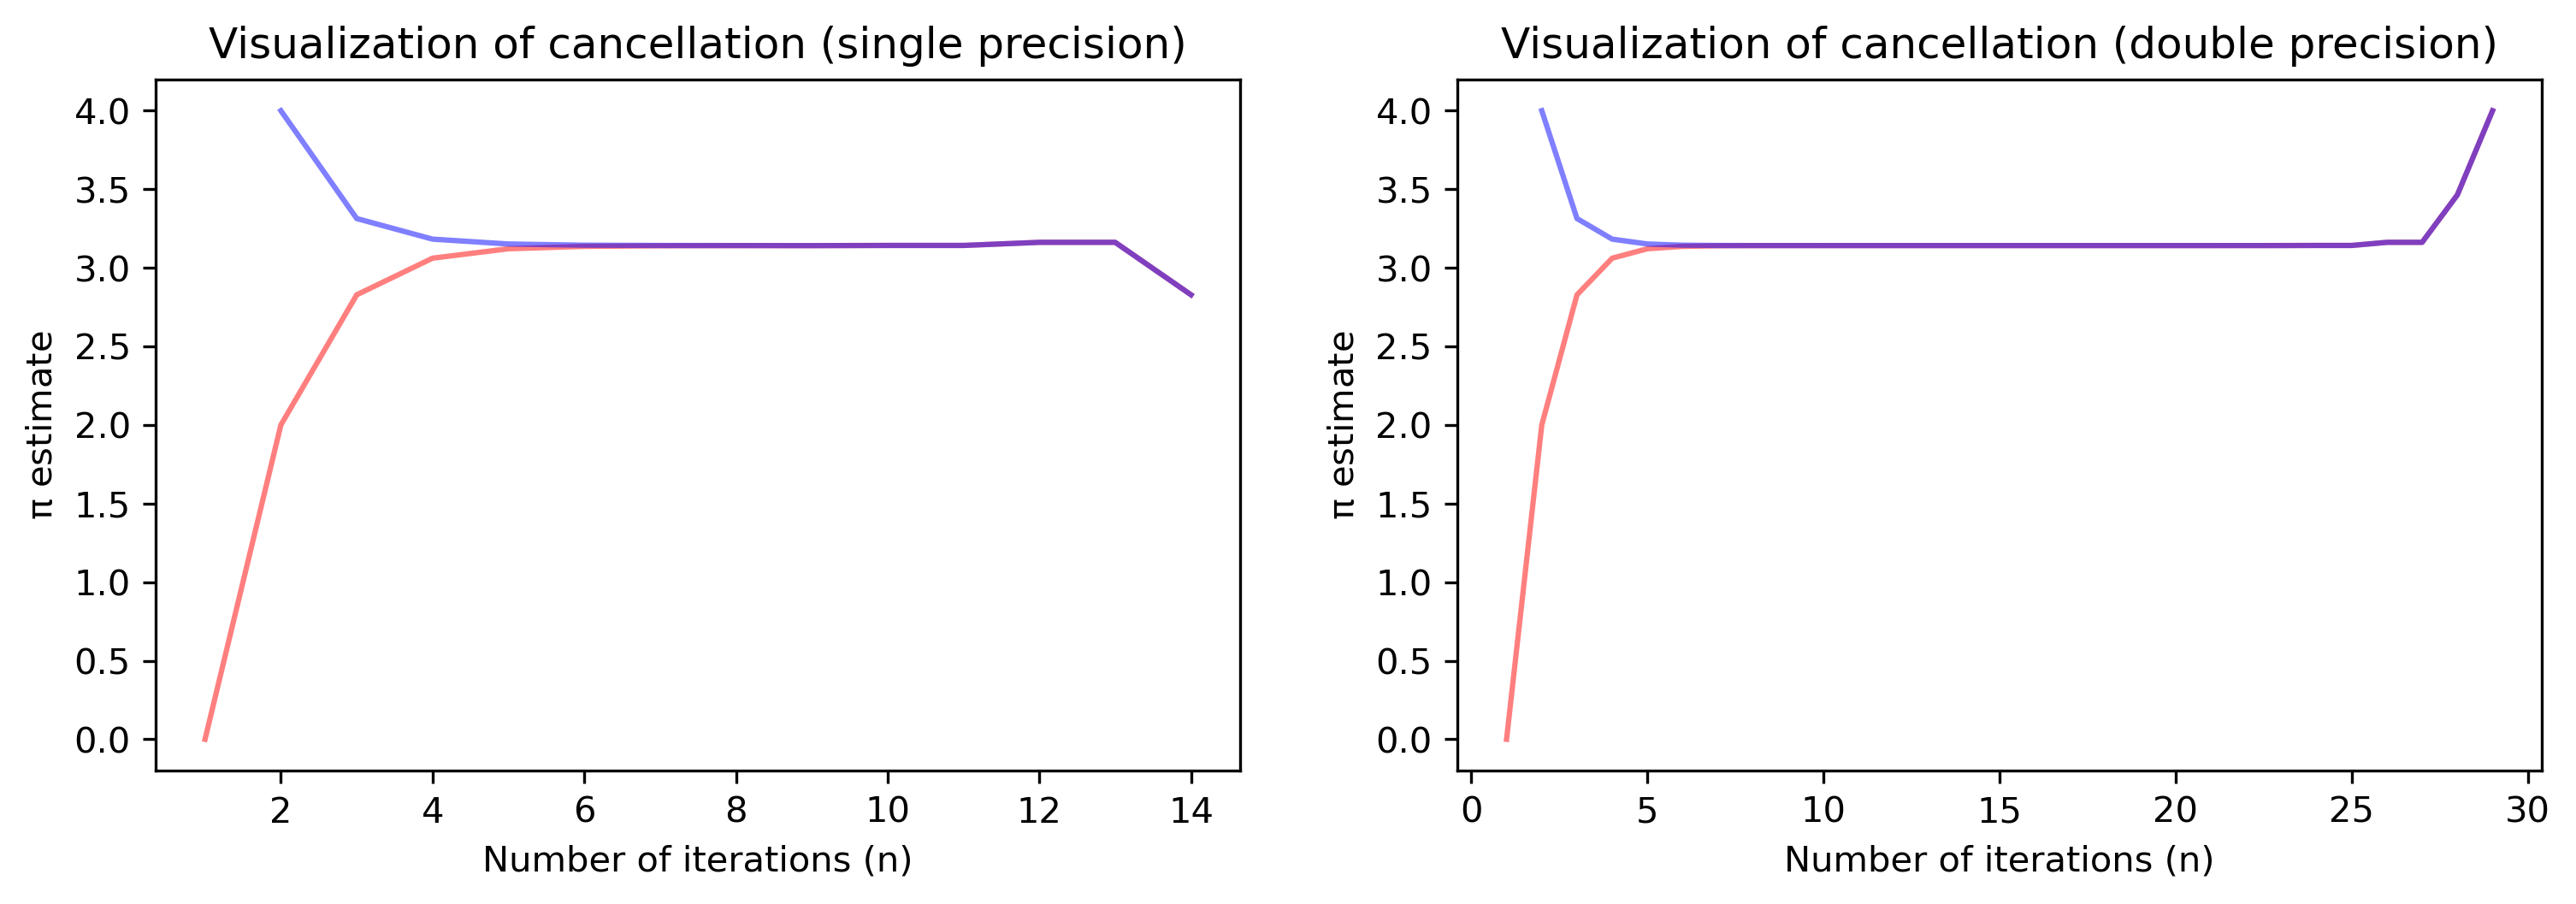

In [19]:
# Create subplots
plt.figure(figsize=(12, 3.5), dpi=300)

data = archimedes_single()  # run Archimedes' algorithm in single precision
data = np.delete(data, 0, 0)
df = pd.DataFrame(data, columns=["n", "a_n", "A_n"])

# Plot for single precision
plt.subplot(1, 2, 1)
plt.title("Visualization of cancellation (single precision)")
plt.xlabel("Number of iterations (n)")
plt.ylabel(r"$\mathrm{\pi}$ estimate")
plt.plot(df["n"], df["a_n"], color ="red", alpha=0.5)
plt.plot(df["n"], df["A_n"], color ="blue", alpha=0.5)

data = archimedes_double()  # run Archimedes' algorithm in double precision
data = np.delete(data, 0, 0)
df = pd.DataFrame(data, columns=["n", "a_n", "A_n"])

# Plot for double precision
plt.subplot(1, 2, 2)
plt.title("Visualization of cancellation (double precision)")
plt.xlabel("Number of iterations (n)")
plt.ylabel("$\mathrm{\pi}$ estimate")
plt.plot(df["n"], df["a_n"], color ="red", alpha=0.5)
plt.plot(df["n"], df["A_n"], color ="blue", alpha=0.5)

plt.show()

The algorithm quickly converges to $\pi$ and is stable until numerical cancellation takes place and skews the curve. Both versions (single and double precision) converge similarly fast, but in double precision, the estimate is maintained longer and is more accurate before drifting off into the opposite direction to the single precision estimate.

Archimedes did not have a computer to run his algorithm on. Instead he calculated everything by hand up until $n = 96$. If he had continued iterating with the algorithm outlined above, writing down decimal numbers on a piece of paper, his calculations would also have suffered from cancellation eventually, given he also would not be able to calculate them with infinite precision.